<a href="https://colab.research.google.com/github/Romane-lrnt/GitConcepts/blob/main/Cours17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/10.1 Datetime Timeseries - ETH_1h.csv')

In [ ]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [ ]:
df.shape

(23674, 7)

In [ ]:
df.loc[0,'Date']

'2020-03-13 08-PM'

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')

In [ ]:
df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [ ]:
df.loc[0, 'Date'].day_name()

'Friday'

In [ ]:
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')
df = pd.read_csv('/content/10.1 Datetime Timeseries - ETH_1h.csv', parse_dates=['Date'], date_parser = d_parser)

<ipython-input-9-7832d659087c>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')


In [ ]:
df['DayOfWeek'] = df['Date'].dt.day_name()

In [ ]:
df

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [ ]:
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [ ]:
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [ ]:
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

In [ ]:
filt = (df['Date'] >= '2020')
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
1744,2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
1745,2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
1746,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
1747,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday


In [ ]:
filt = (df['Date'] >= '2019') & (df['Date'] < '2020')
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [ ]:
filt = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2020-01-01'))
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [ ]:
df['2019']

<ipython-input-22-31e0a15253cd>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019']


,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [ ]:
df['2020-01':'2020-02']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


In [ ]:
df['2020-01':'2020-02']['Close']

Date
2020-02-29 23:00:00    217.31
2020-02-29 22:00:00    223.35
2020-02-29 21:00:00    223.48
2020-02-29 20:00:00    224.63
2020-02-29 19:00:00    225.31
                        ...  
2020-01-01 04:00:00    129.56
2020-01-01 03:00:00    129.57
2020-01-01 02:00:00    130.37
2020-01-01 01:00:00    130.14
2020-01-01 00:00:00    128.34
Name: Close, Length: 1440, dtype: float64

In [ ]:
df['2020-01':'2020-02']['Close'].mean()

195.1655902777778

In [ ]:
df['2020-01':'2020-02'].head(24)

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
2020-02-29 18:00:00,ETHUSD,225.53,226.17,224.50,225.09,496543.91,Saturday
2020-02-29 17:00:00,ETHUSD,222.68,225.53,222.24,225.53,611136.47,Saturday
2020-02-29 16:00:00,ETHUSD,224.17,225.93,222.36,222.68,694384.75,Saturday
2020-02-29 15:00:00,ETHUSD,223.35,225.88,221.80,224.17,550893.74,Saturday


In [ ]:
df['2020-01-01']['High']

<ipython-input-28-e48a28d1775e>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-01-01']['High']


Date
2020-01-01 23:00:00    130.27
2020-01-01 22:00:00    131.41
2020-01-01 21:00:00    131.99
2020-01-01 20:00:00    131.87
2020-01-01 19:00:00    131.72
2020-01-01 18:00:00    132.14
2020-01-01 17:00:00    132.68
2020-01-01 16:00:00    132.56
2020-01-01 15:00:00    132.15
2020-01-01 14:00:00    132.05
2020-01-01 13:00:00    132.08
2020-01-01 12:00:00    131.31
2020-01-01 11:00:00    131.42
2020-01-01 10:00:00    130.33
2020-01-01 09:00:00    130.22
2020-01-01 08:00:00    130.01
2020-01-01 07:00:00    130.25
2020-01-01 06:00:00    130.25
2020-01-01 05:00:00    129.94
2020-01-01 04:00:00    130.00
2020-01-01 03:00:00    130.44
2020-01-01 02:00:00    130.50
2020-01-01 01:00:00    130.14
2020-01-01 00:00:00    128.54
Name: High, dtype: float64

In [ ]:
df['2020-01-01']['High'].max()

<ipython-input-29-9aa11c9125b5>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-01-01']['High'].max()


132.68

In [ ]:
df['High'].resample('D')

In [ ]:
df

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [ ]:
highs = df['High'].resample('D').max()
highs['2020-01-01']

132.68

In [ ]:
%matplotlib inline

<Axes: xlabel='Date'>

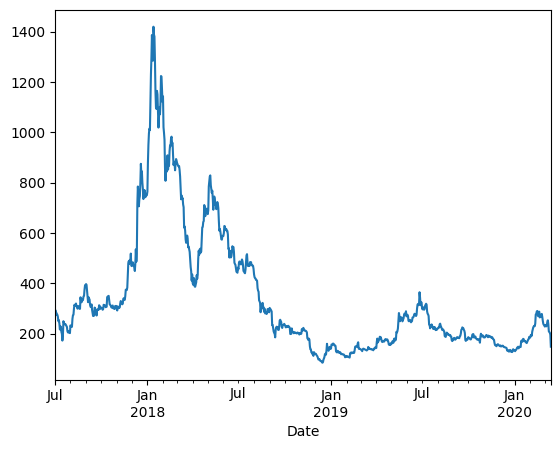

In [ ]:
highs.plot()

In [ ]:
bitcoin=pd.read_csv('/content/BTC-2017min.csv')

In [ ]:
bitcoin.head(10)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1514764740,2017-12-31 23:59:00,BTC/USD,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549
1,1514764680,2017-12-31 23:58:00,BTC/USD,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658
2,1514764620,2017-12-31 23:57:00,BTC/USD,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294
3,1514764560,2017-12-31 23:56:00,BTC/USD,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134
4,1514764500,2017-12-31 23:55:00,BTC/USD,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130
5,1514764440,2017-12-31 23:54:00,BTC/USD,13884.14,13884.14,13823.88,13854.28,4.810702,66648.811119
6,1514764380,2017-12-31 23:53:00,BTC/USD,13854.52,13898.70,13840.85,13884.15,10.469531,145360.540916
7,1514764320,2017-12-31 23:52:00,BTC/USD,13885.00,13898.32,13823.19,13883.13,7.153715,99315.950052
8,1514764260,2017-12-31 23:51:00,BTC/USD,13892.57,13927.21,13885.00,13885.00,0.595928,8274.463890
9,1514764200,2017-12-31 23:50:00,BTC/USD,13927.34,13927.34,13892.57,13927.28,0.565494,7875.797455


In [ ]:
bitcoin=bitcoin.drop(columns=['unix'], inplace=True)

In [ ]:
print(bitcoin)

None
